In [1]:
print('Hello World')

Hello World


In [1]:
%matplotlib inline 
#the output of plotting commands is displayed  directly below the code cell that produced it
import matplotlib.pyplot as plt
import numpy as np
import math 
j = complex(0,1)
wl= np.arange(300.0, 2001.0, 1.0) #<---Wavelengths in interval
l= len(wl)

In [2]:
def R(N1,N2,N3,d):
	delta= -(2.0*math.pi/wl)*N2*d
	r1= (N1-N2)/(N1+N2)
	r2= (N2-N3)/(N2+N3)
	t1 = 2*N1/(N1+N2)
	t2 = 2*N2/(N2+N3)
	r =(r1+r2*np.exp(-2*j*delta))/(np.array([1]*l)+r1*r2*np.exp(-2*j*delta))
	return abs(r)*abs(r)*100	

In [3]:
AIR= np.array([complex(1.0 , 0.0)] * l)
AL2O3 = np.array([complex(1.77 , 0.0)] * l)
MGF2 = np.array([complex(1.38,0.0)] * l)
DIAMOND = np.array([complex(2.43,0.0)] * l)
GLASS = np.array([complex(1.52,0.0)] * l)

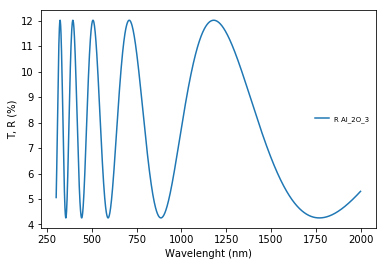

In [9]:

plt.plot(wl,R(AIR, AL2O3, GLASS, 500), label='R Al_2O_3')
plt.xlabel("Wavelenght (nm)")
plt.ylabel("T, R (%)")
plt.legend(loc='center right', fontsize= 7,frameon=False)
plt.show()